In [4]:
# House Sales Data, ETL, Build Predictive Model(linear regression), 
# Assess Model, Deploy Model   'houseSmallData.csv'
# R^2 = 0.75  Percentage of the Price explained by the indep. variables
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### data_description.txt
SalePrice — the property’s sale price in dollars. This is the target variable that you’re trying to predict.  
MSSubClass — The building class  
MSZoning — The general zoning classification 
MasVnrArea - Masonary Veneer Area in sq ft
LotFrontage — Linear feet of street connected to property  
LotArea — Lot size in square feet  
Street — Type of road access  
Alley — Type of alley access  
LotShape — General shape of property  
LandContour — Flatness of the property  
Utilities — Type of utilities available  
LotConfig — Lot configuration  

$$Y = X\beta + e $$

In [6]:
data = pd.read_csv('train.csv')
train = data.iloc[0:100,:]
train.shape


(100, 81)

(array([ 2., 17., 35., 17., 11.,  8.,  5.,  3.,  1.,  1.]),
 array([ 40000.,  79878., 119756., 159634., 199512., 239390., 279268.,
        319146., 359024., 398902., 438780.]),
 <BarContainer object of 10 artists>)

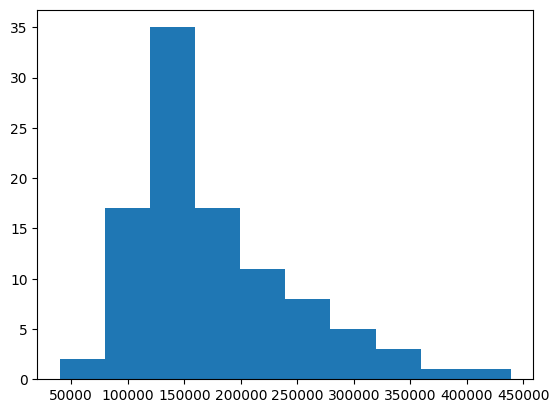

In [7]:
salePrice = train['SalePrice']
salePrice.describe()
plt.hist(salePrice)

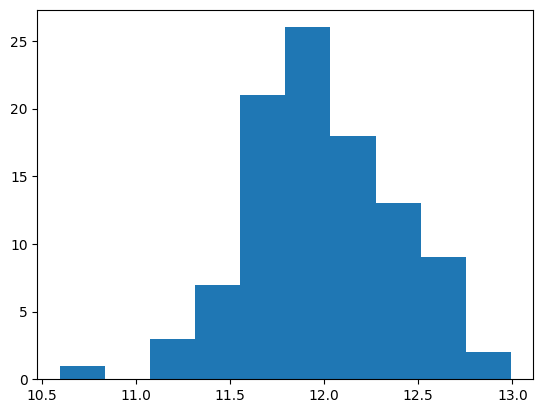

In [8]:
plt.hist(np.log(salePrice))
np.log(salePrice).skew()
target = np.log(salePrice)

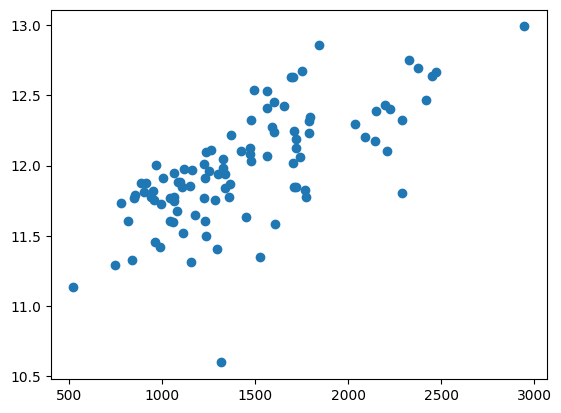

In [9]:
plt.scatter(train['GrLivArea'],y=target)

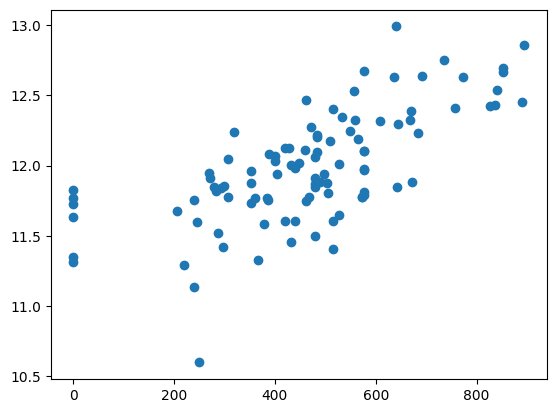

In [10]:
plt.scatter(train['GarageArea'],y=target)

In [7]:
nulls = train.isnull().sum().sort_values(ascending=False)[0:20]
type(nulls)
data = train.select_dtypes(include=[np.number]).interpolate().dropna(axis=1)
sum(data.isnull().sum() != 0)
data.shape

(100, 39)

In [11]:
numeric = data.select_dtypes(include=[np.number])
numeric.head()
corr = numeric.corr()
cols = corr['SalePrice'].sort_values(ascending=False)[:3].index
cols




Index(['SalePrice', 'OverallQual', 'GrLivArea'], dtype='object')

In [12]:
X = data[cols]
Y = X['SalePrice']
X = X.drop(['SalePrice'], axis = 1)
X

,OverallQual,GrLivArea
0,7,1710
1,6,1262
2,7,1786
3,7,1717
4,8,2198
...,...,...
1455,6,1647
1456,6,2073
1457,7,2340
1458,5,1078


In [17]:
%pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [16]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X, Y)
predictions = model.predict(X)
print(f"R^2 is: {model.score(X,Y)}")

R^2 is: 0.7141732234458849


(array([  1.,   1.,   0.,   4., 132., 988., 297.,  27.,   6.,   4.]),
 array([-379572.48333535, -312665.15218014, -245757.82102492,
        -178850.4898697 , -111943.15871449,  -45035.82755927,
          21871.50359595,   88778.83475116,  155686.16590638,
         222593.49706159,  289500.82821681]),
 <BarContainer object of 10 artists>)

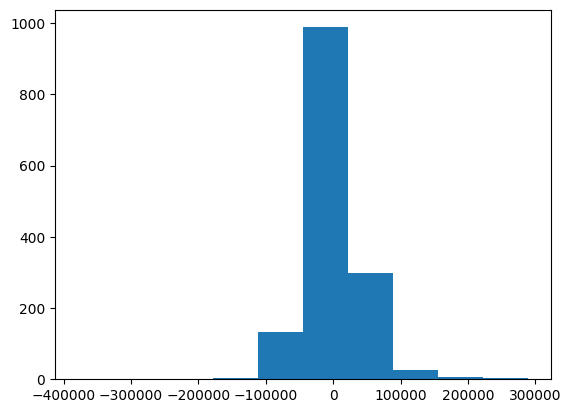

In [18]:
plt.hist(Y - predictions)

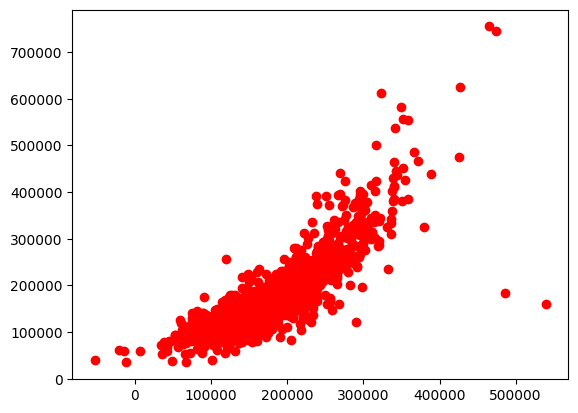

In [19]:
plt.scatter(predictions, Y, color = 'r')

In [14]:
train[['SalePrice', 'OverallQual', 'MasVnrArea']]

,SalePrice,OverallQual,MasVnrArea
0,208500,7,196.0
1,181500,6,0.0
2,223500,7,162.0
3,140000,7,0.0
4,250000,8,350.0
...,...,...,...
95,185000,6,68.0
96,214000,7,183.0
97,94750,4,48.0
98,83000,5,0.0


In [21]:
test = pd.read_csv('test.csv')
test.shape
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [16]:
X = test[cols]
Y = X['SalePrice']
X = X.drop(['SalePrice'], axis = 1)
X


,OverallQual,GrLivArea
0,6,1610
1,6,1732
2,5,1535
3,7,1226
4,7,1818
...,...,...
95,6,1456
96,7,1726
97,8,3112
98,6,2229


In [19]:
import sklearn as sklearn
predictions = model.predict(X)
print(f"R^2 is: {model.score(X,Y)}")
sklearn.metrics.mean_squared_error(predictions, Y)

R^2 is: 0.6927421490147458


1958089162.3697333